# Black Friday Sales Prediction

###  In this competition my task is to predict the purchase amount in test.csv. Through the dataset, I want to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers againstdifferent products

### Kaggle Dataset link :- https://www.kaggle.com/c/gb-black-friday-sales/overview
### My Kaggle submission score- 0.67
### Student Name : Vikash Shrivastava
### Student Number : D20123649

## Importing libraries

In [92]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

###  loading of train and test dataset



In [93]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

###  finding shape of train and test data

In [95]:
print(train.shape)
print(test.shape)

(80000, 12)
(20000, 11)


##    List all datas in train

In [96]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773
3,1000097,P00211242,F,36-45,3,C,3,0,8,12.0,NaN,8116
4,1005802,P00327142,F,26-35,0,A,4+,0,8,15.0,NaN,6144


###   How many unique products each user have bought 

In [97]:
train.groupby(['User_ID'])['Product_ID'].nunique()

User_ID
1000001     6
1000002    10
1000003     3
1000004     1
1000005    16
           ..
1006036    60
1006037    16
1006038     1
1006039    11
1006040    24
Name: Product_ID, Length: 5763, dtype: int64

In [98]:
##    finding data types in train 

train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [99]:
##    finding data types in test

test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [100]:
##    information in train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80000 non-null  int64  
 1   Product_ID                  80000 non-null  object 
 2   Gender                      80000 non-null  object 
 3   Age                         80000 non-null  object 
 4   Occupation                  80000 non-null  int64  
 5   City_Category               80000 non-null  object 
 6   Stay_In_Current_City_Years  80000 non-null  object 
 7   Marital_Status              80000 non-null  int64  
 8   Product_Category_1          80000 non-null  int64  
 9   Product_Category_2          54892 non-null  float64
 10  Product_Category_3          24331 non-null  float64
 11  Purchase                    80000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


###   Description of train data

In [101]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.000000e+04,80000.000000,80000.000000,80000.000000,54892.000000,24331.000000,80000.000000
mean,1.003023e+06,8.086863,0.409388,5.388463,9.851873,12.676421,9243.933162
std,1.728959e+03,6.536459,0.491724,3.922793,5.079163,4.109343,5021.298356
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001503e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5679.750000
50%,1.003067e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8039.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12046.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Value_Counts()

### The value_counts() function returns an object containing counts of unique values.This means it enables us to count the number of unique elements in age column 

In [102]:
train['Age'].value_counts()

26-35    32067
36-45    16025
18-25    14286
46-50     6777
51-55     5555
55+       3110
0-17      2180
Name: Age, dtype: int64

In [103]:
## top 10 data in head

train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773
3,1000097,P00211242,F,36-45,3,C,3,0,8,12.0,NaN,8116
4,1005802,P00327142,F,26-35,0,A,4+,0,8,15.0,NaN,6144
5,1001912,P00276942,M,26-35,4,A,1,1,8,NaN,NaN,2122
6,1004285,P00295942,M,36-45,0,B,3,0,2,5.0,15.0,12715
7,1003320,P00134542,M,26-35,1,B,1,1,5,14.0,NaN,1766
8,1003080,P00184942,M,26-35,20,A,4+,1,1,8.0,17.0,15837
9,1001194,P00111942,F,26-35,1,B,1,1,8,17.0,NaN,10071


## Missing Values

In [104]:
def missing_val(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [105]:
##  missing value percentage of each column in train data

missing_val(train)

Product_Category_3            69.58625
Product_Category_2            31.38500
User_ID                        0.00000
Product_ID                     0.00000
Gender                         0.00000
Age                            0.00000
Occupation                     0.00000
City_Category                  0.00000
Stay_In_Current_City_Years     0.00000
Marital_Status                 0.00000
Product_Category_1             0.00000
Purchase                       0.00000
dtype: float64

In [106]:
##  missing value percentage of each column in test data

missing_val(test)

Product_Category_3            69.68
Product_Category_2            32.01
User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
dtype: float64

# Visualisation 

Let's see the purchase amount by product categories

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


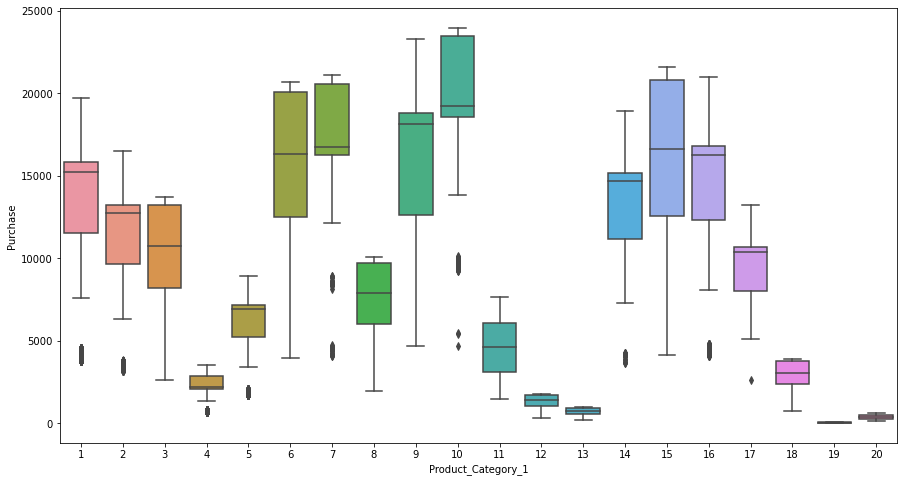

In [107]:
##  Product 1

plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_1'],train['Purchase'])


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


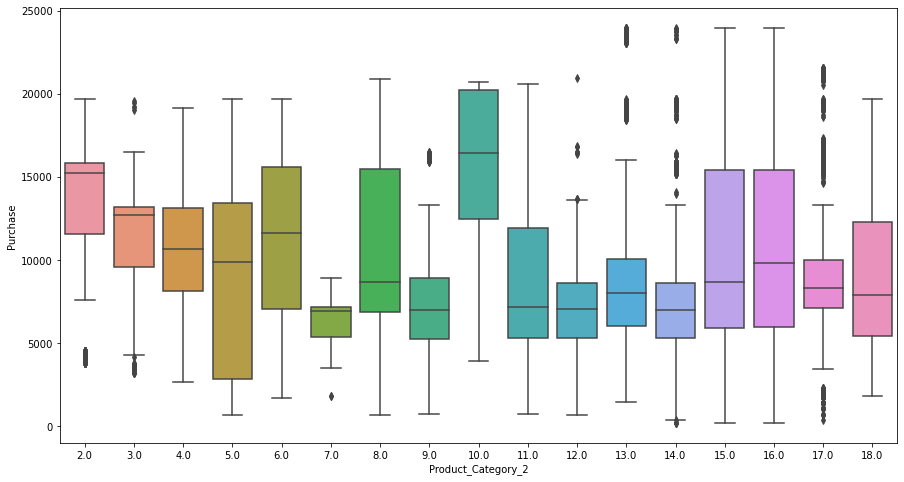

In [108]:
##  Product 2

plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_2'],train['Purchase'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


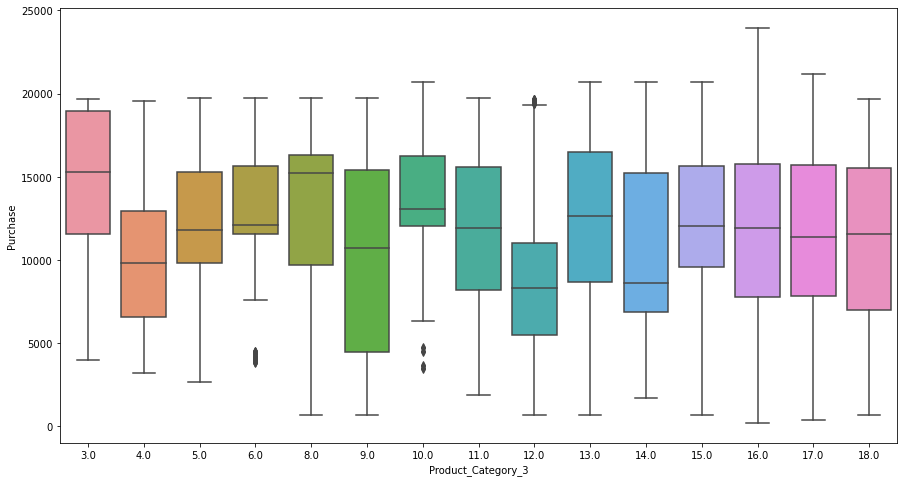

In [109]:
##  Product 3

plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_3'],train['Purchase'])

# Most of the buyers are between the age of 26-35

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


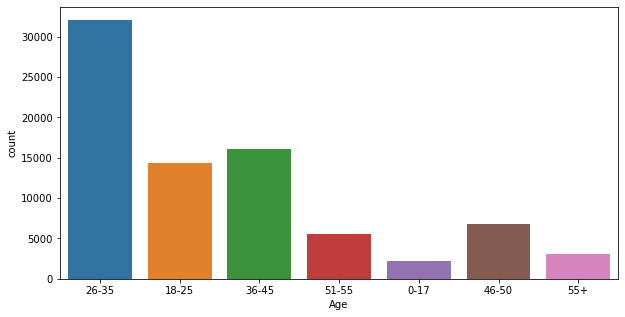

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(train['Age'])

### Age does not highly impact the purchasing power of user

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


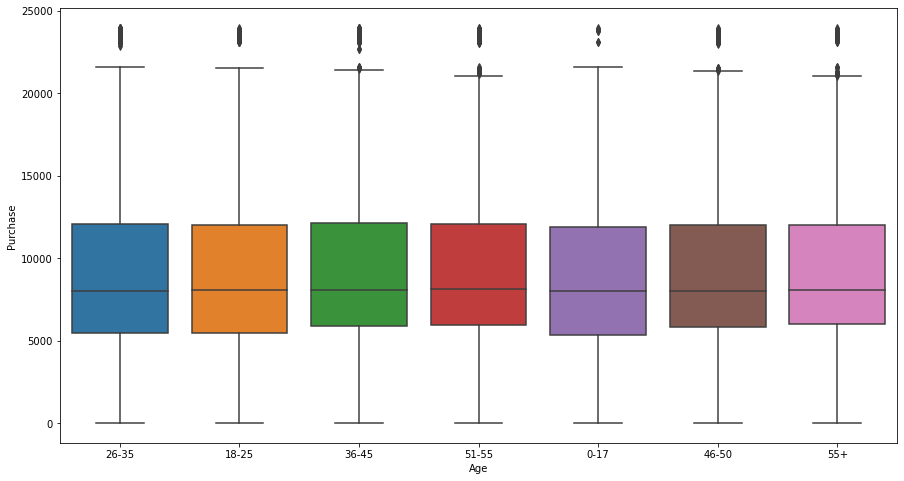

In [111]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Age'],train['Purchase'])

### Most of the buyers are from city category B

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


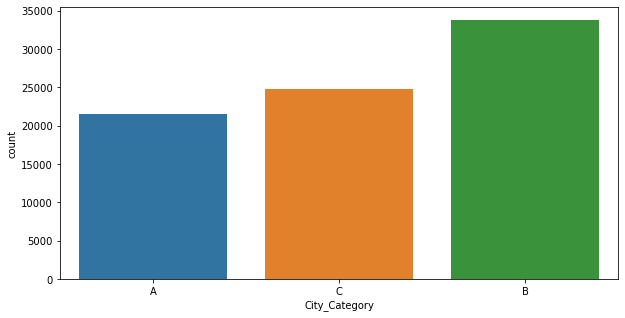

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(train['City_Category'])

## Purchasing power of users of category C city is highest followed by B and A

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


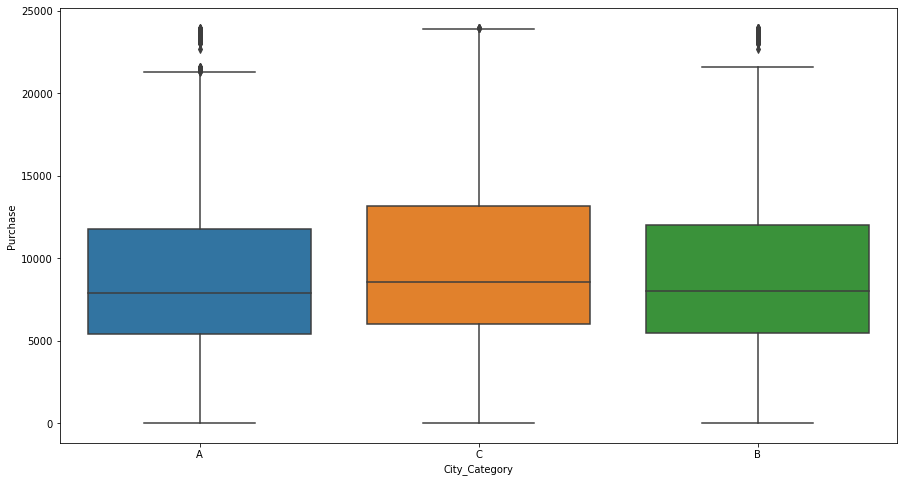

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(train['City_Category'],train['Purchase'])

### Most of the buyers are new comers in the city probably new comers want to buy home appliances, furnitures etc.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


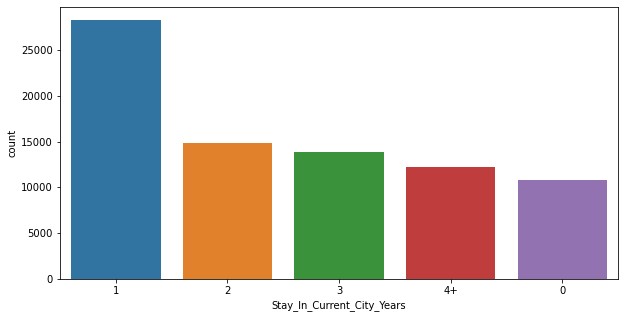

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(train['Stay_In_Current_City_Years'])

### Purchasing power is not much dependent on years of staying in curent city

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


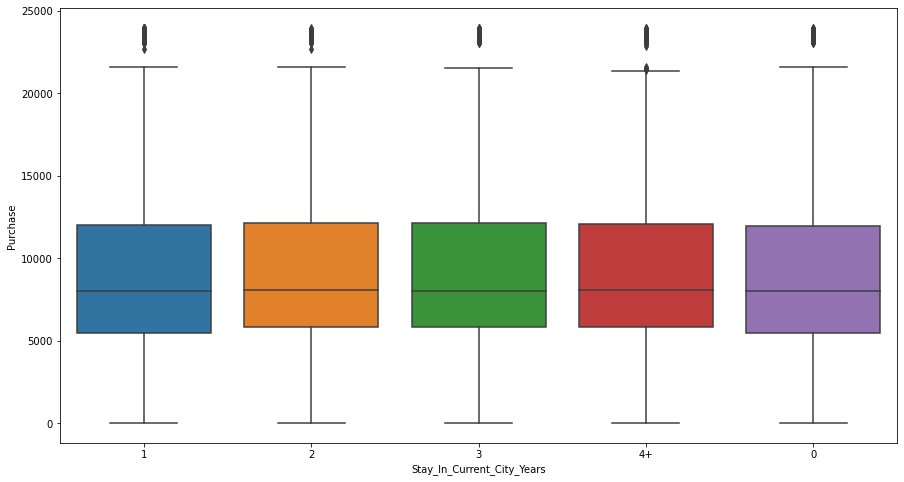

In [115]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Stay_In_Current_City_Years'],train['Purchase'])

### Purchase variable seems to be normally distributed

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


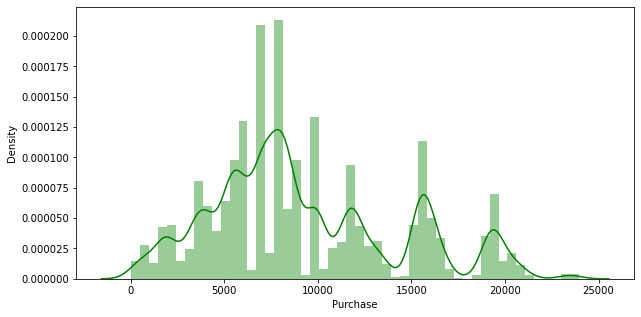

In [116]:
plt.figure(figsize=(10,5))
sns.distplot(train['Purchase'],color='green')

In [118]:
train['Product_ID'].value_counts()

P00265242    272
P00025442    225
P00112142    224
P00058042    221
P00110742    220
            ... 
P00076942      1
P00259642      1
P00111342      1
P00316042      1
P00020542      1
Name: Product_ID, Length: 3256, dtype: int64

## There are around 300 products that are purchased many times and then products purchased rarely

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


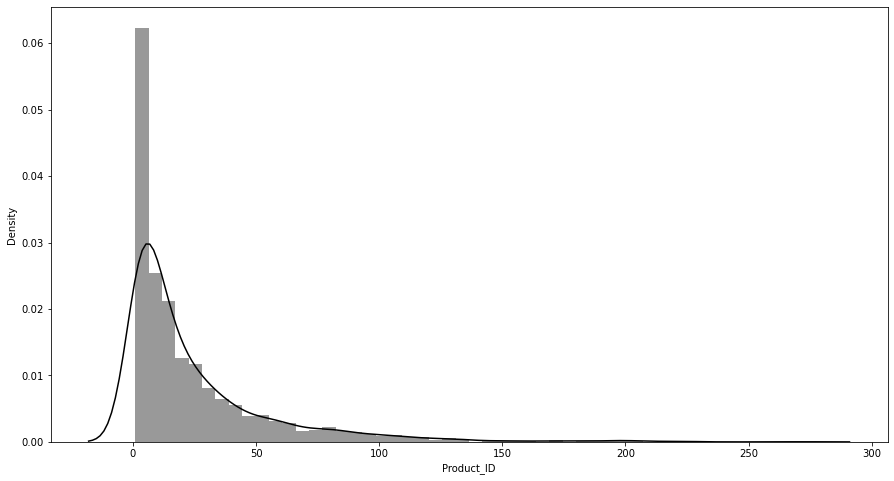

In [119]:
plt.figure(figsize=(15,8))
sns.distplot(train['Product_ID'].value_counts(),color='black')

# Label Encoding

In [120]:
def label_encoding(df):
    df['Age']=df['Age'].replace('0-17',17)
    df['Age']=df['Age'].replace('18-25',25)
    df['Age']=df['Age'].replace('26-35',35)
    df['Age']=df['Age'].replace('36-45',45)
    df['Age']=df['Age'].replace('46-50',50)
    df['Age']=df['Age'].replace('51-55',55)
    df['Age']=df['Age'].replace('55+',60)
    df['Gender']=df['Gender'].replace('F',0)
    df['Gender']=df['Gender'].replace('M',1)
    df['City_Category']=df['City_Category'].replace('A',0)
    df['City_Category']=df['City_Category'].replace('B',1)
    df['City_Category']=df['City_Category'].replace('C',2)
    df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
    return df

In [121]:
train=label_encoding(train)
test=label_encoding(test)

In [122]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)

## NaN values in product categories looks like representing that user did not purchase from that product category , it is a good idea to replace nan with zero's

In [123]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [124]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [125]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [126]:
dfd=train.copy()
dft=test.copy()


In [43]:
#train=dfd.copy()
#test=dft.copy

## Let's create few new variables, average purchase by Product_ID and User_ID

In [127]:
avg_purchase_per_product=pd.DataFrame(train.groupby(['Product_ID'])['Purchase'].mean())
avg_purchase_per_product.reset_index(inplace=True)
avg_purchase_per_user=pd.DataFrame(train.groupby(['User_ID'])['Purchase'].mean())
avg_purchase_per_user.reset_index(inplace=True)

In [128]:
def create_var(data):
    product_count=pd.DataFrame(data['Product_ID'].value_counts())

    product_count.reset_index(inplace=True)
    product_count=product_count.rename(columns={'index':'Product_ID','Product_ID':'Product_count'})

    data['avg_purchase_per_product']=data['Product_ID'].map(avg_purchase_per_product.set_index('Product_ID')['Purchase'])
    data['product_count']=data['Product_ID'].map(product_count.set_index('Product_ID')['Product_count'])
    data['avg_purchase_per_user']=data['User_ID'].map(avg_purchase_per_user.set_index('User_ID')['Purchase'])

    conditions = [
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] == 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] != 0)]
    choices = [1, 2, 3]
    data['Category_Count'] = np.select(conditions, choices, default=0)
    
    return data

In [129]:
train=create_var(train)
test=create_var(test)

In [130]:
train['Product_ID']=train['Product_ID'].str.slice(2).astype(int)
test['Product_ID']=test['Product_ID'].str.slice(2).astype(int)

In [131]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1004085,75742,0,35,6,0,1,0,8,14.0,0.0,7803,6850.479167,48,9516.878378,2
1,1005491,234842,1,25,7,0,1,0,5,6.0,16.0,6903,6869.953846,65,6823.692308,3
2,1003499,220142,1,35,3,0,2,0,1,15.0,0.0,15773,12536.421053,57,10421.282051,2
3,1000097,211242,0,45,3,2,3,0,8,12.0,0.0,8116,8260.315789,19,9441.538462,2
4,1005802,327142,0,35,0,0,4,0,8,15.0,0.0,6144,6125.714286,14,10780.000000,2


In [132]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1002118,108542,1,35,14,0,1,1,5,8.0,14.0,7622.348837,14,7626.833333,3
1,1002476,86442,1,55,12,2,1,1,8,13.0,15.0,8078.864662,45,9245.333333,3
2,1005220,248442,1,35,7,1,4,0,3,4.0,0.0,10790.657143,9,8649.223881,2
3,1005213,270242,1,25,0,2,2,0,8,0.0,0.0,7896.839506,13,7097.000000,1
4,1002374,106042,1,35,14,1,2,0,5,0.0,0.0,7528.753846,26,13674.100000,1


In [133]:
test.isnull().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3             0
avg_purchase_per_product      79
product_count                  0
avg_purchase_per_user         79
Category_Count                 0
dtype: int64

In [134]:
test.fillna(0,inplace=True)

# avg_purchase_per_product,avg_purchase_per_user,Category_Count and Product_Category_3 are most important features

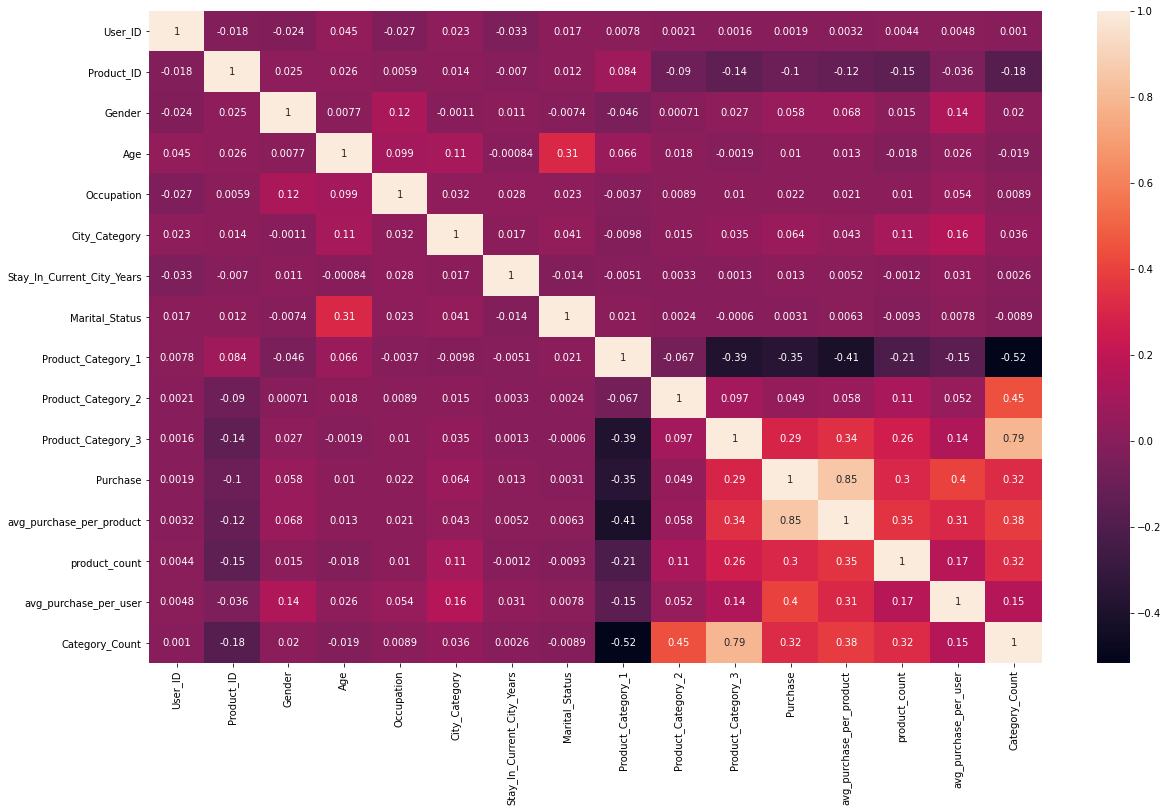

In [135]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

## Let's try different combinations of feature with purchase to get more insight

In [136]:
gender_p=train.groupby(['Gender'])['Purchase'].mean()

In [137]:
gender_p

Gender
0    8736.278045
1    9412.385280
Name: Purchase, dtype: float64

### Males are willing to spend more than females

In [139]:
age_p=train.groupby(['Age'])['Purchase'].mean()

In [140]:
age_p

Age
17    9043.184404
25    9188.344393
35    9224.353915
45    9333.005554
50    9163.746200
55    9362.748335
60    9345.426688
Name: Purchase, dtype: float64

### teens (i.e 0-17 age) are spending a little bit less than other age categories but not large difference

In [141]:
occupation_p=train.groupby(['Occupation'])['Purchase'].mean()

In [142]:
occupation_p

Occupation
0     9133.375736
1     8908.184655
2     8883.118732
3     9042.020015
4     9218.444796
5     9122.862390
6     9240.741213
7     9398.039179
8     9058.658120
9     8952.451575
10    9047.564499
11    9115.370457
12    9772.058346
13    9309.939929
14    9553.266005
15    9732.215537
16    9466.763426
17    9827.481341
18    9006.156281
19    8642.719396
20    8761.682218
Name: Purchase, dtype: float64

In [143]:
print(occupation_p.mean())
print(occupation_p.std())

9199.672088008352
326.0623638948001


### So occupation has a little bit impact on purchase

In [145]:
city_cat_p=train.groupby(['City_Category'])['Purchase'].mean()

In [146]:
city_cat_p

City_Category
0    8870.003775
1    9140.460420
2    9708.725280
Name: Purchase, dtype: float64

### C category city users are spending higher followed by B and A

In [147]:
marital_p=train.groupby(['Marital_Status'])['Purchase'].mean()

In [148]:
marital_p

Marital_Status
0    9230.801181
1    9262.878324
Name: Purchase, dtype: float64

#  There is almost no difference between amount spent by males and females

In [152]:
years_p=train.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean()

In [153]:
years_p

Stay_In_Current_City_Years
0    9101.288776
1    9204.070138
2    9305.458935
3    9329.028441
4    9290.795184
Name: Purchase, dtype: float64

### There is no significant differnce between amount spent by numbers of years of living in current city

# Model Development

In [154]:
X=train.drop('Purchase',axis=1)

In [155]:
y=train['Purchase']

In [156]:
print(X.shape)
print(y.shape)

(80000, 15)
(80000,)


In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

## 1st Model :-  Linear Regression

In [159]:
reg=linear_model.LinearRegression()
lm_model=reg.fit(X_train,y_train)
pred=lm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

2527.2749990446146

## 2nd Model :- Decision Tree

In [160]:
DT_reg=DecisionTreeRegressor()


In [161]:
DT_model=DT_reg.fit(X_train,y_train)

In [162]:
pred=DT_model.predict(X_test)

In [166]:
np.sqrt(mean_squared_error(y_test,pred))

3574.926852485936

## 3rd Model :- Random Forest

In [167]:
RF_reg=RandomForestRegressor()

In [168]:
RF_model=RF_reg.fit(X_train,y_train)

In [169]:
np.sqrt(mean_squared_error(y_test,pred))

3574.926852485936

## 4th Model :- XGBoost

In [181]:
from xgboost.sklearn import XGBRegressor

In [182]:
xgb=XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)

In [183]:
XGB_model=xgb.fit(X_train,y_train)

In [184]:
pred=XGB_model.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [185]:
np.sqrt(mean_squared_error(y_test,pred))

2609.0666358339413

## 5th Model:- Neural network

In [114]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [115]:
model = MLPRegressor(learning_rate='adaptive',hidden_layer_sizes=(100,50),alpha = 0.3,activation='relu')
model.fit(X_train,y_train)

MLPRegressor(alpha=0.3, hidden_layer_sizes=(100, 50), learning_rate='adaptive')

In [116]:
p_test = model.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test,pred))

3589.629045206134

##    What can be done 

 No improvement with neral network based model,but can be improved by tuning hidden layer sizes, 
 Due to infrastructure issue , I was unable to build large complex neural nets

# Final Submission

In [190]:
purchase=XGB_model.predict(test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [191]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1002118,108542,1,35,14,0,1,1,5,8.0,14.0,7622.348837,14,7626.833333,3
1,1002476,86442,1,55,12,2,1,1,8,13.0,15.0,8078.864662,45,9245.333333,3
2,1005220,248442,1,35,7,1,4,0,3,4.0,0.0,10790.657143,9,8649.223881,2
3,1005213,270242,1,25,0,2,2,0,8,0.0,0.0,7896.839506,13,7097.000000,1
4,1002374,106042,1,35,14,1,2,0,5,0.0,0.0,7528.753846,26,13674.100000,1


In [192]:
test=test[['User_ID','Product_ID']]

In [193]:
test['Purchase']=purchase

In [196]:
test.to_csv('submission_ML_Assignment_Vikash_Shrivastava.csv',index=False)


### I have submitted submission_ML_Assignment_Vikash_Shrivastava.csv in kaggle competition and I have been awarded with a score of 0.67193

#  Below are each model predictions 

### Linear Regression 2527.2749990446146 ,
### Decision Tree 3574.947791410736 ,
### Random Forest 3574.947791410736 ,
### XGBoost 2609.0666358339413 ,
### I have also founded Neural network model prediction as 3589.629045206134 which is again not good , hence XGBOOST is best
### We can see that XGBoost has best model predictions as its lowest , XGBoost is performing the best so I have taken XGBoost as my final submission

